### Insurance Prediction

#### Import Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [3]:
#Load data
insure_df = pd.read_csv('insurance.csv')

insure_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### EDA

In [62]:
insure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations : 1338 non null values in 6 columns

In [68]:
insure_df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


<AxesSubplot:xlabel='age', ylabel='expenses'>

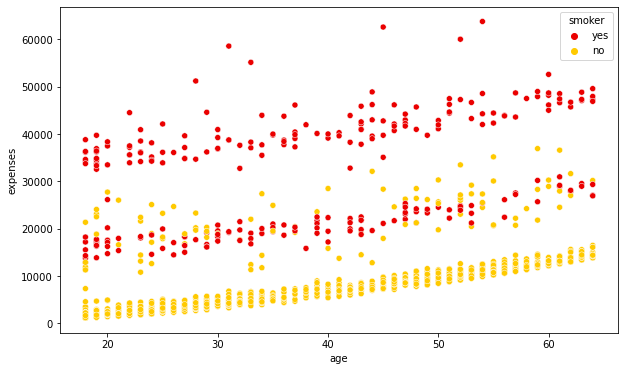

In [80]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = insure_df['age'], y = insure_df['expenses'], hue = insure_df['smoker'], palette = 'hot')

#There is smoker in teen age itself and the smoker are comparitively have high insurance price among all ages

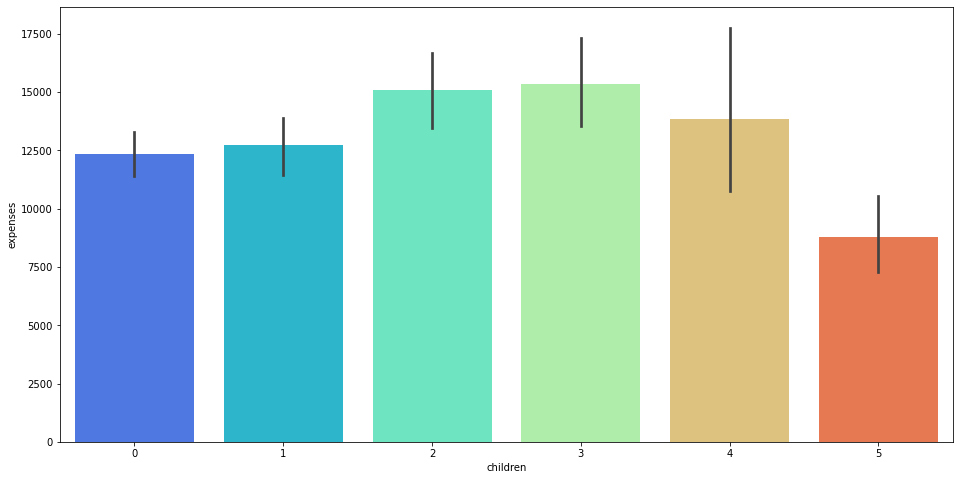

In [85]:
plt.figure(figsize = (16,8))
sns.barplot(x = insure_df['children'], y = insure_df['expenses'], palette = 'rainbow');
#It's quite interesting people with 5 children have less insurance expenses

In [66]:
insure_df.groupby(['region'])['expenses'].sum()

region
northeast    4343668.64
northwest    4035711.93
southeast    5363689.80
southwest    4012754.82
Name: expenses, dtype: float64

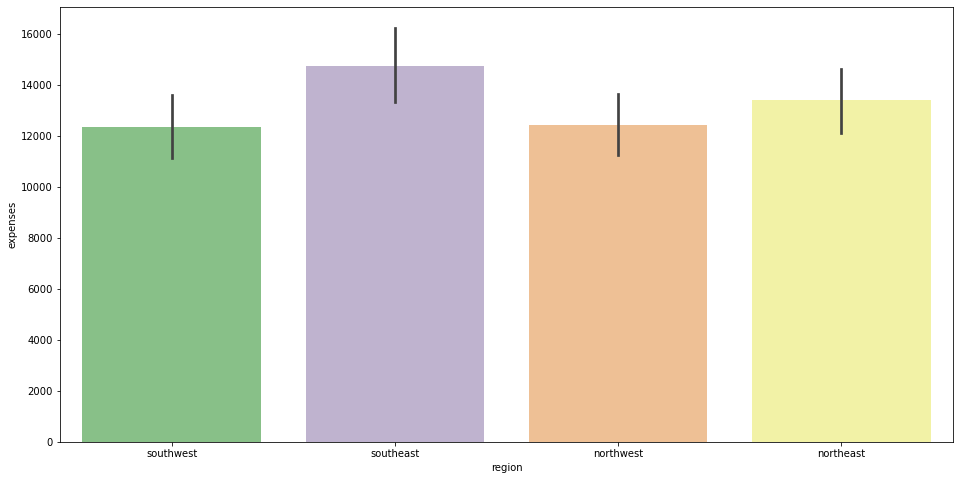

In [86]:
plt.figure(figsize = (16,8))
sns.barplot(x = insure_df['region'], y = insure_df['expenses'], palette = 'Accent');
#Southeast people have more insurance expenses

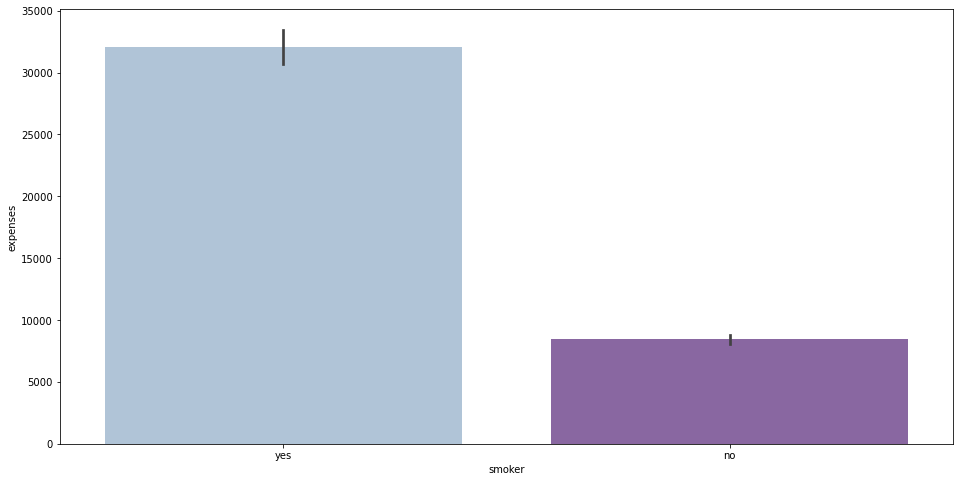

In [88]:
plt.figure(figsize = (16,8))
sns.barplot(x = insure_df['smoker'], y = insure_df['expenses'], palette = 'BuPu');
#Smoker people have more insurance expenses

<AxesSubplot:>

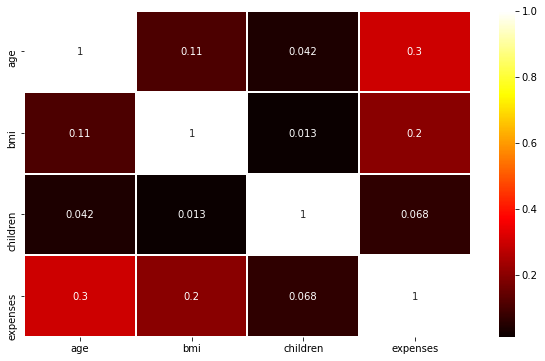

In [90]:
corr = insure_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, linewidths = 1.0, cmap = 'hot')

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

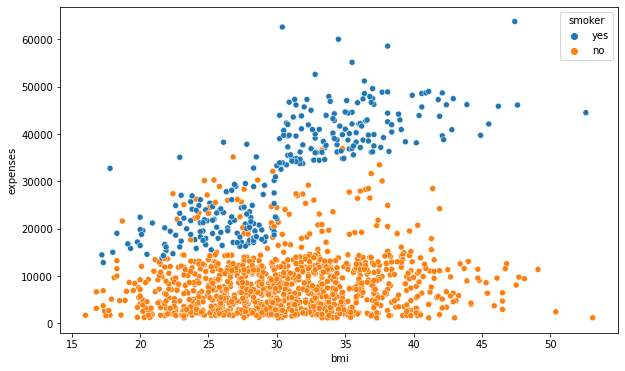

In [74]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = insure_df['bmi'] , y = insure_df ['expenses'], hue = insure_df ['smoker'])
#if bmi is low then insurance expenses is low for non - smoker

### Encoding

In [91]:
#Encoding Categorical variable 
df = pd.get_dummies(insure_df, drop_first = True)

In [104]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [92]:
X = df.drop(['expenses'], axis = 1)

In [93]:
y = df['expenses']

### Train and Test Split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [106]:
lm = LinearRegression()

In [107]:
lm.fit(X_train, y_train)

LinearRegression()

In [113]:
test_pre = lm.predict(X_test)

train_pred = lm.predict(X_train)

<AxesSubplot:ylabel='Density'>

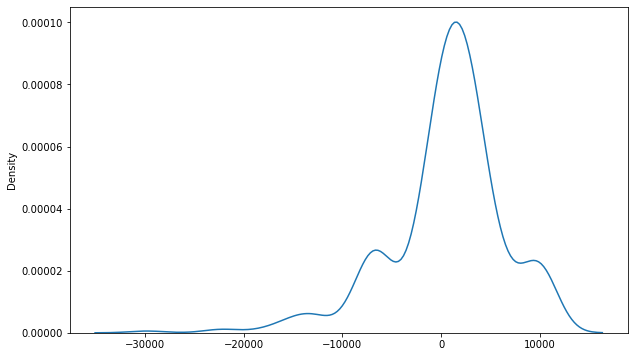

In [109]:
plt.figure(figsize = (10,6))
sns.kdeplot(test_pre - np.array(y_test))
#Residuals follow normal distribution

<AxesSubplot:ylabel='Density'>

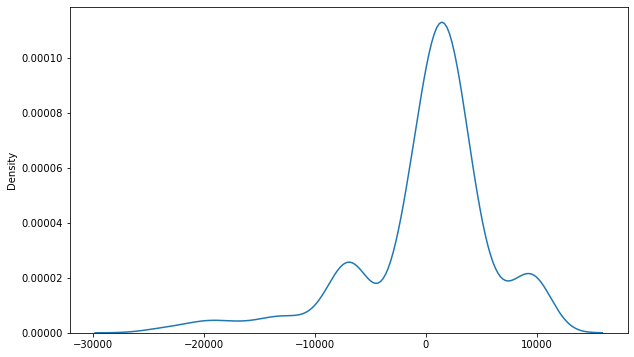

In [114]:
plt.figure(figsize = (10,6))
sns.kdeplot(train_pre - np.array(y_train))
#Residuals follow normal distribution

### Homoscedasticity 

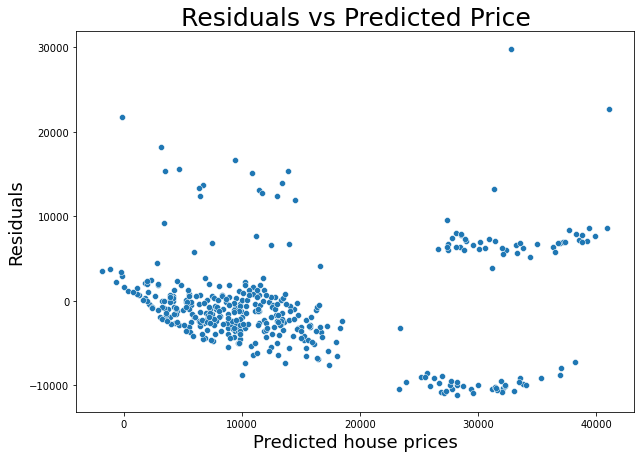

In [118]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs Predicted Price",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
sns.scatterplot(x = test_pre, y = y_test - test_pre);

In [115]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pre))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pre))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pre)))

print('Test R2: ', metrics.r2_score(y_test, test_pre))

Train MAE:  4260.9776318596105
Train MSE:  37683752.77255582
Train RSME:  6138.7093735211
Train R2:  0.7455824800587142
-------------------------------
Test MAE:  4195.915154310768
Test MSE:  33886312.79456486
Test RSME:  5821.195134554833
Test R2:  0.762800450334816


#### Ordinary Least Square Stats

In [120]:
reg = sm.OLS(y, X).fit()

In [121]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):                        0.00
Time:                        19:31:31   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                202.9839     11.620     17.469      0.000     180.189     225.779
bmi                 69.3184     18.814      3.684      0.000      32.410     106.227
children           289.0487    144.210      2.004      0.045       6.144     571.953
sex_male          -665.7681    347.527     -1.916      0.056   -1347.528      15.992
smoker_yes        2.337e+04    433.141     53.965      0.000    2.25e+04    2.42e+04
region_northwest -1736.3234    486.878     -3.566      0.000   -2691.456    -781.191
region_southeast -1282.3217    503.665     -2.546      0.011   -2270.386    -294.257
region_southwest -1950.2315    495.855     -3.933      0.000   -2922.976    -977.487
==============================================================================
Omnibus:                      275.165   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.067
Skew:                           1.123   Prob(JB):                    2.29e-140
Kurtosis:                       5.548   Cond. No.                         206.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :
* All P-values are falling in level of significance area, so we reject null hypothesis i.e all variable add significance to predict insurance expenses

* Durbin-Watson test values states that there is no auto-correlation between data	